In [1]:
import tensorflow as tf
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/Users/Shaan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Shaan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Shaan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Shaan/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
tf.__version__

'1.13.2'

In [3]:
pd.__version__

'0.23.4'

In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

<h2>Basic Inspection of Data</h2>

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.shape

(1460, 81)

In [7]:
test_data.shape

(1459, 80)

In [8]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Removing Sale Price and putting it in 'target'
target = pd.DataFrame(train_data['SalePrice'])
train_data = train_data.drop(['SalePrice'], axis=1)

In [10]:
type(target)

pandas.core.frame.DataFrame

In [11]:
target.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [12]:
train_data.shape

(1460, 80)

In [13]:
# combining both data sets
combined_data = train_data.append(test_data)
combined_data.reset_index(inplace=True)

In [14]:
combined_data.drop(['index', 'Id'], inplace=True, axis=1)
combined_data.shape

(2919, 79)

In [15]:
combined_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


<h2>Preparing the Data</h2>

In [16]:
no_null = []
for col in combined_data.columns:
    if not combined_data[col].isnull().any():
        no_null.append(col)

In [17]:
len(no_null)

45

In [18]:
#Removing colums with null values
combined_data = combined_data[no_null]

In [19]:
combined_data.shape

(2919, 45)

In [20]:
#Splitting into numerical and categorical variables
num_column= []
cat_column= []
num_column = list(combined_data._get_numeric_data().columns)
cat_column = list(set(combined_data.columns) - set(num_column))

In [21]:
#checking
len(num_column)+len(cat_column) == combined_data.shape[1]

True

In [22]:
#Inspecting the type of features
print(num_column)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [23]:
#Inspecting the type of features
print(cat_column)

['LandSlope', 'Condition1', 'ExterQual', 'SaleCondition', 'HouseStyle', 'HeatingQC', 'Foundation', 'Neighborhood', 'Condition2', 'ExterCond', 'LandContour', 'PavedDrive', 'RoofMatl', 'BldgType', 'Heating', 'LotConfig', 'RoofStyle', 'Street', 'CentralAir', 'LotShape']


In [24]:
combined_data[cat_column].head()

,LandSlope,Condition1,ExterQual,SaleCondition,HouseStyle,HeatingQC,Foundation,Neighborhood,Condition2,ExterCond,LandContour,PavedDrive,RoofMatl,BldgType,Heating,LotConfig,RoofStyle,Street,CentralAir,LotShape
0,Gtl,Norm,Gd,Normal,2Story,Ex,PConc,CollgCr,Norm,TA,Lvl,Y,CompShg,1Fam,GasA,Inside,Gable,Pave,Y,Reg
1,Gtl,Feedr,TA,Normal,1Story,Ex,CBlock,Veenker,Norm,TA,Lvl,Y,CompShg,1Fam,GasA,FR2,Gable,Pave,Y,Reg
2,Gtl,Norm,Gd,Normal,2Story,Ex,PConc,CollgCr,Norm,TA,Lvl,Y,CompShg,1Fam,GasA,Inside,Gable,Pave,Y,IR1
3,Gtl,Norm,TA,Abnorml,2Story,Gd,BrkTil,Crawfor,Norm,TA,Lvl,Y,CompShg,1Fam,GasA,Corner,Gable,Pave,Y,IR1
4,Gtl,Norm,Gd,Normal,2Story,Ex,PConc,NoRidge,Norm,TA,Lvl,Y,CompShg,1Fam,GasA,FR2,Gable,Pave,Y,IR1


In [25]:
combined_data[num_column].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008


In [26]:
# The following numerical values are actually categorical: 
#MSSubClass
#OverallQual
#OverallCond
num_column.remove('MSSubClass')
num_column.remove('OverallQual')
num_column.remove('OverallCond')
cat_column.append('MSSubClass')
cat_column.append('OverallQual')
cat_column.append('OverallCond')

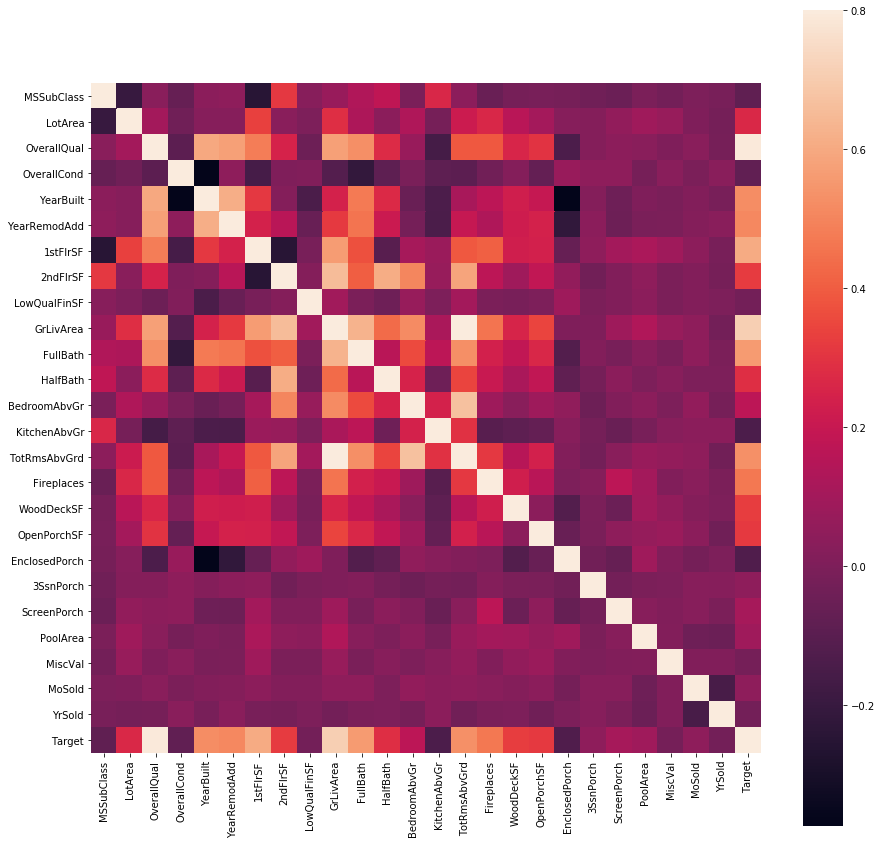

In [27]:
# Heatmap to see if the features each other much
df = combined_data.copy(deep = True)
df['Target'] = target
C_mat = df.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [28]:
len(cat_column)+len(num_column)

45

In [29]:
# Function to one-hot-encode categorical columns
def oneHotEncode(df,colNames):
    for col in colNames:   
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)
            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [30]:
combined_data.shape

(2919, 45)

In [31]:
combined_data = oneHotEncode(combined_data, cat_column)

In [32]:
combined_data.shape

(2919, 181)

In [33]:
train_data = combined_data[:1460]
test_data = combined_data[1460:]

In [200]:
exp = train_data.copy(deep = True)
exp = exp.astype('float32')
exp.shape

(1460, 181)

<h1>Neural Net</h1>

In [205]:
# Learning rate and epochs
learning_rate= 0.0001
epochs = 500

In [206]:
# Number of input, output, neurons per layer
n_input = train_data.shape[1] #181
n_hidden_1 = 128
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256
n_hidden_5 = 256
n_output = target.shape[1] #1

In [207]:
# Placeholder
x = tf.placeholder(tf.float32, (None, n_input))
y_ = tf.placeholder(tf.float32, (None, n_output))

In [208]:
y_

<tf.Tensor 'Placeholder_15:0' shape=(?, 1) dtype=float32>

In [209]:
# weights
weights = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'w2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'w3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'w4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'w5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_output])),
    'lin': tf.Variable(tf.random_normal([1]))
}

In [210]:
#biases
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_output])),
}

In [211]:
#define function in each layer + output_layer
hidden_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
hidden_1 = tf.nn.relu(hidden_1)
    
hidden_2 = tf.add(tf.matmul(hidden_1, weights['w2']), biases['b2'])
hidden_2 = tf.nn.relu(hidden_2)
    
hidden_3 = tf.add(tf.matmul(hidden_2, weights['w3']), biases['b3'])
hidden_3 = tf.nn.relu(hidden_3)
    
hidden_4 = tf.add(tf.matmul(hidden_3, weights['w4']), biases['b4'])
hidden_4 = tf.nn.relu(hidden_4)
    
hidden_5 = tf.add(tf.matmul(hidden_4, weights['w5']), biases['b5'])
hidden_5 = tf.nn.relu(hidden_5)
    
output_layer = tf.multiply(tf.add(tf.matmul(hidden_5, weights['out']), biases['out']), weights['lin'])

In [212]:
#22813 iterations
def next_batch(iteration, df):
    step = iteration%46
    base = step*32
    if (base+32) < train_data.shape[0]:
        end = base+32
    else:
        end = train_data.shape[0]
    
    return df[base:end]

In [213]:
#put output_layer in y

y = output_layer

In [214]:
error = tf.abs(tf.subtract(y, y_))
cost_function = tf.reduce_mean(error)
training_step = tf.train.AdamOptimizer(learning_rate).minimize(cost_function)
init_l = tf.local_variables_initializer()
init_g = tf.global_variables_initializer()

In [215]:
# run session
sess = tf.Session()
sess.run(init_g)
sess.run(init_l) 
    
for i in range(22813):
        batch_val = next_batch(i, exp)
        batch_target = next_batch(i, target)
        sess.run(training_step, feed_dict = {x: batch_val, y_: batch_target})
        cost = sess.run(cost_function, feed_dict={x: batch_val, y_: batch_target})
        if i%500==0:
            print("Iteration %d:  %d" % (i, cost))
        if i==22812:
            print() 
            print("Iteration %d:  %d" % (i, cost))
    

Iteration 0:  82982672
Iteration 500:  832863
Iteration 1000:  389543
Iteration 1500:  414319
Iteration 2000:  425963
Iteration 2500:  255460
Iteration 3000:  289574
Iteration 3500:  122555
Iteration 4000:  75568
Iteration 4500:  50458
Iteration 5000:  39840
Iteration 5500:  20691
Iteration 6000:  45047
Iteration 6500:  28805
Iteration 7000:  29314
Iteration 7500:  29928
Iteration 8000:  34373
Iteration 8500:  42998
Iteration 9000:  28073
Iteration 9500:  27069
Iteration 10000:  23769
Iteration 10500:  34315
Iteration 11000:  23485
Iteration 11500:  26835
Iteration 12000:  30540
Iteration 12500:  19590
Iteration 13000:  30642
Iteration 13500:  24785
Iteration 14000:  36902
Iteration 14500:  36870
Iteration 15000:  24321
Iteration 15500:  22476
Iteration 16000:  38174
Iteration 16500:  37335
Iteration 17000:  19768
Iteration 17500:  36551
Iteration 18000:  44721
Iteration 18500:  17127
Iteration 19000:  20047
Iteration 19500:  21483
Iteration 20000:  22665
Iteration 20500:  30751
Iterat

<h2>Preparing Subission File</h2>

In [217]:
exp_test = test_data.copy(deep = True)
exp_test = exp_test.astype('float32')
exp_test.head()

,LotArea,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9
1460,11622.0,1961.0,1961.0,896.0,0.0,0.0,896.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1461,14267.0,1958.0,1958.0,1329.0,0.0,0.0,1329.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1462,13830.0,1997.0,1998.0,928.0,701.0,0.0,1629.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,9978.0,1998.0,1998.0,926.0,678.0,0.0,1604.0,2.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1464,5005.0,1992.0,1992.0,1280.0,0.0,0.0,1280.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [229]:

prediction = sess.run(y, feed_dict={x:exp_test})

In [232]:
prediction = pd.Series(map(lambda x: x[0], prediction))

In [233]:
my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})

In [234]:
my_submission.head()

,Id,SalePrice
0,1461,123739.070312
1,1462,290399.062500
2,1463,199659.062500
3,1464,175917.015625
4,1465,181666.859375


In [237]:
my_submission.to_csv('{}.csv'.format('submission1'),index=False)